## Part 1 : Load Data

In [2]:
import xarray as xr
import pandas as pd

In [16]:
file_path = 'D:/Projects/fiji-training-2024/data/module_9.2.f001'

In [26]:
ds = xr.open_dataset(file_path, engine='cfgrib')
ds

skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "C:\Users\Rifani\anaconda3\envs\grib-handle\lib\site-packages\cfgrib\dataset.py", line 680, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "C:\Users\Rifani\anaconda3\envs\grib-handle\lib\site-packages\cfgrib\dataset.py", line 611, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "C:\Users\Rifani\anaconda3\envs\grib-handle\lib\site-packages\cfgrib\dataset.py", line 680, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "C:\Users\Rifani\anaconda3\envs\grib-handle\lib\site-packages\cfgrib\dataset.py", line 611, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key

<xarray.Dataset>
Dimensions:            (latitude: 121, longitude: 61)
Coordinates:
    time               datetime64[ns] ...
    step               timedelta64[ns] ...
    surface            float64 ...
  * latitude           (latitude) float64 -35.0 -34.75 -34.5 ... -5.5 -5.25 -5.0
  * longitude          (longitude) float64 165.0 165.2 165.5 ... 179.8 180.0
    valid_time         datetime64[ns] ...
    heightAboveGround  float64 ...
Data variables:
    t                  (latitude, longitude) float32 ...
    t2m                (latitude, longitude) float32 ...
    r2                 (latitude, longitude) float32 ...
    tmax               (latitude, longitude) float32 ...
    tmin               (latitude, longitude) float32 ...
    tp                 (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2024-06-25T05:13 GRIB to CDM+CF via cfgrib-0.9.1...

In [19]:
df = pd.read_csv('D:/Projects/fiji-training-2024/data/fj.csv')

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Suva,-18.1416,178.4419,Fiji,FJ,Rewa,primary,185913,88271
1,Nadi,-17.8000,177.4167,Fiji,FJ,Ba,NaN,71048,71048
2,Nausori,-18.0244,178.5454,Fiji,FJ,Tailevu,NaN,57882,57882
3,Lautoka,-17.6242,177.4528,Fiji,FJ,Ba,NaN,52220,52220
4,Labasa,-16.4311,179.3703,Fiji,FJ,Macuata,NaN,27949,27949
5,Lami,-18.1167,178.4167,Fiji,FJ,Rewa,NaN,20529,20529
6,Nakasi,-18.0667,178.5167,Fiji,FJ,Naitasiri,NaN,18919,18919
7,Ba,-17.5333,177.6833,Fiji,FJ,Ba,NaN,18526,18526
8,Sigatoka,-18.1414,177.5069,Fiji,FJ,Nadroga and Navosa,NaN,9622,9622
9,Navua,-18.2200,178.1800,Fiji,FJ,Serua,NaN,5812,5812


## Part 2 : Extracting data at locations

In [32]:
# make a function to map precipitation value to weather condition
def weather_condition(precipitation):
    if precipitation < 0.1:
        return 'Clear'
    elif precipitation < 1:
        return 'Light Rain'
    elif precipitation < 5:
        return 'Rain'
    elif precipitation < 10:
        return 'Heavy Rain'
    else:
        return 'Very Heavy Rain'

In [35]:
data_holder = []
for index, row in df.iterrows():
    city = row['city']
    lat = row['lat']
    lon = row['lng']
    t = ds['t2m'].interp(latitude=lat, longitude=lon, method='linear') - 273.15
    rh = ds['r2'].interp(latitude=lat, longitude=lon, method='linear')
    tmax = ds['tmax'].interp(latitude=lat, longitude=lon, method='linear') - 273.15
    tmin = ds['tmin'].interp(latitude=lat, longitude=lon, method='linear') - 273.15
    tp = ds['tp'].interp(latitude=lat, longitude=lon, method='linear')
    wx = weather_condition(tp.values)
    data_holder.append([city, lat, lon, t.values.round(1), rh.values.round(0), tmax.values.round(1), tmin.values.round(1), tp.values.round(2), wx])
    print(f'{city} - t: {t.values}, rh: {rh.values}, tmax: {tmax.values}, tmin: {tmin.values}, tp: {tp.values} mm, wx: {wx}')

Suva - t: 23.308802569648492, rh: 72.03031085970204, tmax: 23.39122529812505, tmin: 23.148477923652422, tp: 0.029028919999999816 mm, wx: Clear
Nadi - t: 19.501642475586152, rh: 79.14214986389108, tmax: 19.64077857177756, tmin: 19.421390368652567, tp: 0.0 mm, wx: Clear
Nausori - t: 22.49877505976565, rh: 75.76340025591304, tmax: 22.652257270117218, tmin: 22.3439307482422, tp: 0.04615775999999983 mm, wx: Clear
Lautoka - t: 20.503097275390758, rh: 76.38676028053688, tmax: 20.639796782851647, tmin: 20.447891807500127, tp: 0.0 mm, wx: Clear
Labasa - t: 22.483948225615222, rh: 72.01996411947863, tmax: 22.82407053505858, tmin: 22.306686647802735, tp: 0.008288669999998957 mm, wx: Clear
Lami - t: 22.7808733233594, rh: 74.17054148547432, tmax: 22.875530514506806, tmin: 22.640589900507848, tp: 0.03194221999999973 mm, wx: Clear
Nakasi - t: 22.711212758715703, rh: 74.92702263258865, tmax: 22.853833925195204, tmin: 22.550928115161014, tp: 0.04276389000000237 mm, wx: Clear
Ba - t: 19.183578190971673,

In [37]:
wx_df = pd.DataFrame(data_holder, columns=['city', 'lat', 'lon', 't', 'rh', 'tmax', 'tmin', 'tp', 'wx'])
wx_df

,city,lat,lon,t,rh,tmax,tmin,tp,wx
0,Suva,-18.1416,178.4419,23.3,72.0,23.4,23.1,0.03,Clear
1,Nadi,-17.8000,177.4167,19.5,79.0,19.6,19.4,0.00,Clear
2,Nausori,-18.0244,178.5454,22.5,76.0,22.7,22.3,0.05,Clear
3,Lautoka,-17.6242,177.4528,20.5,76.0,20.6,20.4,0.00,Clear
4,Labasa,-16.4311,179.3703,22.5,72.0,22.8,22.3,0.01,Clear
5,Lami,-18.1167,178.4167,22.8,74.0,22.9,22.6,0.03,Clear
6,Nakasi,-18.0667,178.5167,22.7,75.0,22.9,22.6,0.04,Clear
7,Ba,-17.5333,177.6833,19.2,80.0,19.3,19.1,0.00,Clear
8,Sigatoka,-18.1414,177.5069,20.3,79.0,20.4,20.2,0.00,Clear
9,Navua,-18.2200,178.1800,23.0,74.0,23.0,22.9,0.04,Clear


## Part 3 : Create Map

In [38]:
import folium

In [47]:
def wx_icon(wx):
    if wx == 'Clear':
        return 'D:/Projects/fiji-training-2024/data/sun.png'
    else:
        return 'D:/Projects/fiji-training-2024/data/rainy.png'
    
def create_popup(row):
    popup_content = f"""
    <b>{row['city']}</b><br>
    Temperature: {row['t']}°C<br>
    Humidity: {row['rh']}%<br>
    Max Temp: {row['tmax']}°C<br>
    Min Temp: {row['tmin']}°C<br>
    Precipitation: {row['tp']} mm
    """
    return popup_content

In [66]:
m = folium.Map(location=[-18.0, 180.0], zoom_start=7)

In [67]:
# add markers and custom html popup
for index, row in wx_df.iterrows():
    popup_content = create_popup(row)
    folium.Marker([row['lat'], row['lon']], 
                  popup=folium.Popup(popup_content, max_width=300), 
                  icon=folium.CustomIcon(wx_icon(row['wx']),icon_size=(30, 30))).add_to(m)
    # folium.Marker([row['lat'], row['lon']], icon=folium.CustomIcon(wx_icon(row['wx']), icon_size=(30, 30))).add_to(m)


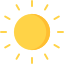
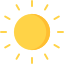
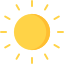
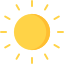
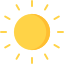
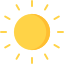
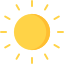
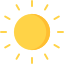
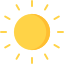
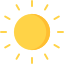
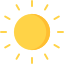
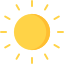
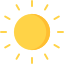

In [68]:
m